### Conetxt

Welcome to this notebook for the Otto Group Product Classification Challenge! The Otto Group is a global e-commerce company that sells millions of products worldwide, with several thousand products being added to its product line every day. Accurately clustering similar products is essential for analyzing the performance of their products, but due to their diverse global infrastructure, many identical products get classified differently. In this competition, we are tasked with building a predictive model that can distinguish between the main product categories based on a dataset containing 93 numerical features for more than 200,000 products.

Data fields
- id - an anonymous id unique to a product
- feat_1, feat_2, ..., feat_93 - the various features of a product
- target - the class of a product

Let's get started!

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

import imblearn
from imblearn.over_sampling import RandomOverSampler

### Data reading

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sampleSubmission.csv')

In [4]:
train.shape, test.shape, sample.shape

((61878, 95), (144368, 94), (144368, 10))

In [5]:
train.columns

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

In [6]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [7]:
train.tail()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9
61877,61878,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Class_9


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [9]:
train.isna().sum().sum()

0

### EDA

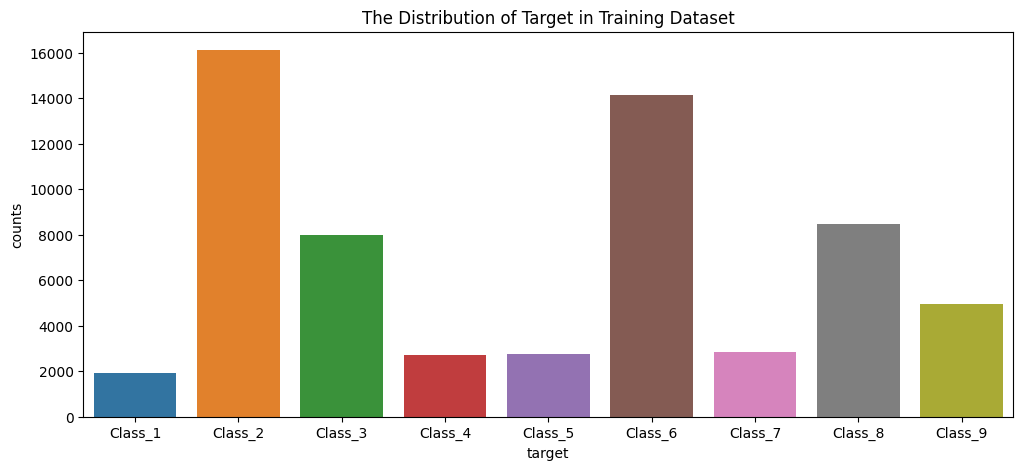

In [10]:
g_target = train.groupby(['target']).size().reset_index(name='counts')

plt.figure(figsize=(12,5))
plt.title('The Distribution of Target in Training Dataset')
ax = sns.barplot(x="target", y="counts", data=g_target)
plt.show()

In [11]:
train['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

Looking at the distribution of the target variables, we can see that the dataset is imbalanced. Class_2 and Class_6 have the highest number of products with 16,122 and 14,135 respectively, while Class_1 has the fewest products with only 1,929. This is important to keep in mind when building our predictive model, as an imbalanced dataset can lead to biased model predictions. We may need to use techniques such as oversampling or undersampling to balance the dataset before training the model, or use evaluation metrics that are more appropriate for imbalanced datasets, such as precision, recall, and F1-score.

### Transform the target

In [12]:
le = LabelEncoder()
le.fit(train["target"])
train["target"] = le.transform(train["target"])

### Data splitting

In [13]:
train_X = train.drop(['target','id'], axis=1)
train_y = train['target']

In [14]:
# split train set into 2 parts with same distribution: 80% train, 20% validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(train_X.values, train_y):
    X_train = train_X.values[train_index]
    X_val = train_X.values[test_index]

    y_train = train_y[train_index]
    y_val = train_y[test_index]

### Oversampling the data

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,61878.0,30939.500000,17862.784315,1.0,15470.25,30939.5,46408.75,61878.0
feat_1,61878.0,0.386680,1.525330,0.0,0.00,0.0,0.00,61.0
feat_2,61878.0,0.263066,1.252073,0.0,0.00,0.0,0.00,51.0
feat_3,61878.0,0.901467,2.934818,0.0,0.00,0.0,0.00,64.0
feat_4,61878.0,0.779081,2.788005,0.0,0.00,0.0,0.00,70.0
...,...,...,...,...,...,...,...,...
feat_90,61878.0,0.812421,4.597804,0.0,0.00,0.0,0.00,130.0
feat_91,61878.0,0.264941,2.045646,0.0,0.00,0.0,0.00,52.0
feat_92,61878.0,0.380119,0.982385,0.0,0.00,0.0,0.00,19.0
feat_93,61878.0,0.126135,1.201720,0.0,0.00,0.0,0.00,87.0


In [16]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

unique, counts = np.unique(y_ros, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0 12898]
 [    1 12898]
 [    2 12898]
 [    3 12898]
 [    4 12898]
 [    5 12898]
 [    6 12898]
 [    7 12898]
 [    8 12898]]


<Axes: >

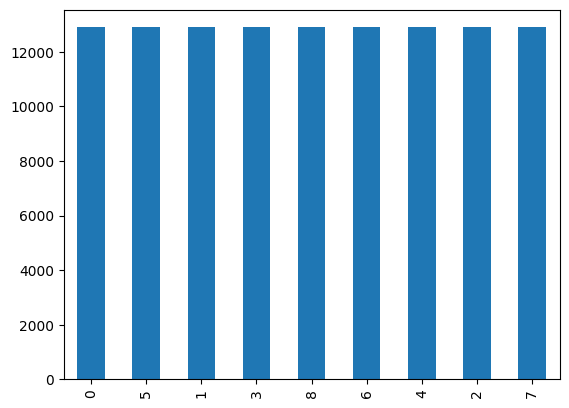

In [17]:
pd.Series(y_ros).value_counts().plot.bar()

### Scaling the features

Scaling the features is important because it can improve the performance and accuracy of many machine learning algorithms. When features are measured on different scales, with different units or ranges, some algorithms can be influenced more by features with larger scales than by those with smaller scales. This can cause some features to dominate the model, leading to biased or suboptimal results.

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [19]:
# also for the testing data
test_X = test.drop(["id"], axis=1)
scaler_all = StandardScaler()
train_X_scaled = scaler_all.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### XGBoost

In [20]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
preds = xgb.predict_proba(X_val_scaled)
score = log_loss(y_val, preds)
print("test data log loss eval : {}".format(log_loss(y_val,preds)))

test data log loss eval : 0.47193172882378664


### Hyper parameters tuning

XGBoost is a powerful and widely used machine learning algorithm for supervised learning tasks, such as classification and regression. Like many machine learning algorithms, XGBoost has several hyperparameters that need to be set before training the model, such as the learning rate, maximum depth, and number of trees.

Hyperparameter tuning is important in XGBoost because it can significantly impact the performance and accuracy of the model. By adjusting the hyperparameters, we can find the optimal combination of values that can improve the model's performance on the given dataset. For example, setting a higher learning rate can lead to faster convergence and shorter training times, but may also cause the model to overfit. Similarly, setting a higher maximum depth can increase the model's complexity and ability to fit the training data, but may also lead to overfitting and poor generalization.

#### Evolution with the number of estimators

In [ ]:
# Define the list of hyperparameters to tune
n_estimators = [100, 400, 450, 500, 525, 550, 600]

# Define an empty list to store the validation scores
val_scores = []

# Loop over the values of n_estimators and train and evaluate the XGBoost model for each value
for nes in n_estimators:
    
    # Define the XGBoost model with the current hyperparameter values
    xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=nes, max_depth=7, min_child_weight=3, subsample=0.8,
                              colsample_bytree=0.8, nthread=4, seed=42, objective='multi:softprob')
    
    # Train the XGBoost model on the scaled training data
    xgb_model.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled validation data
    val_preds = xgb_model.predict_proba(X_val_scaled)
    
    # Compute the log loss score on the validation data and append it to the list of validation scores
    val_score = log_loss(y_val, val_preds)
    val_scores.append(val_score)
    
    # Print the log loss score for the current hyperparameter values
    print(f"Validation log loss for n_estimators={nes}: {val_score:.4f}")

Validation log loss for n_estimators=100: 0.5048
Validation log loss for n_estimators=400: 0.4395


In [ ]:
plt.plot(n_estimators,val_scores,'o-')
plt.ylabel(log_loss)
plt.xlabel("n_estimator")
print("best n_estimator {}".format(n_estimators[np.argmin(val_scores)]))

#### Evolution with the number of the max depth

In [ ]:
scores_md = []
max_depths = [1,3,5,6,7,8,10]

for md in max_depths:
    xgb = XGBClassifier(learning_rate =0.1, n_estimators=n_estimators[np.argmin(val_scores)], 
                        max_depth=md, min_child_weight=3, subsample=0.8, 
                        colsample_bytree=0.8, nthread=4, seed=42, objective='multi:softprob')
    xgb.fit(X_train_scaled, y_train)
    preds = xgb.predict_proba(X_val_scaled)
    score = log_loss(y_val, preds)
    scores_md.append(score)
    print("test data log loss eval : {}".format(log_loss(y_val,preds)))

best max_depth 7


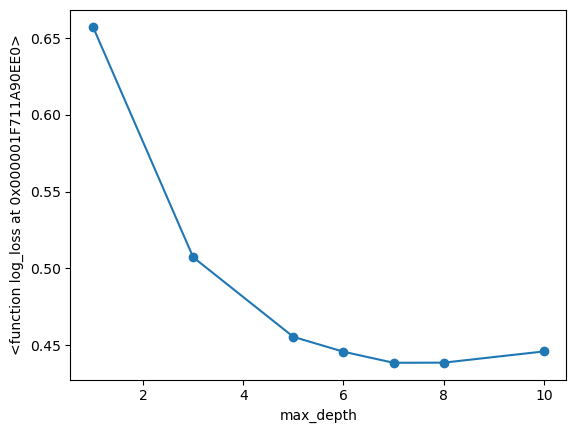

In [ ]:
plt.plot(max_depths,scores_md,'o-')
plt.ylabel(log_loss)
plt.xlabel("max_depth")
print("best max_depth {}".format(max_depths[np.argmin(scores_md)]))

We will be optimizing our model using the log loss instead of accuracy because we have 9 classes in the target variable. Accuracy can be a misleading metric in cases where the classes are imbalanced, as it only considers the number of correct predictions made without considering the likelihood of the predicted class. In contrast, log loss takes into account the probability of the predicted class, penalizing highly confident wrong predictions more severely than less confident ones.

Since we have 9 classes, the likelihood of a random guess is 1/9, which is 0.111. This means that if we have an accuracy of 50%, which may seem high, it actually performs only slightly better than a random guess. Therefore, we need to use a metric that takes into account the probability of each prediction and rewards models that assign high probabilities to the correct class. Log loss is a widely used metric for multiclass classification problems that does exactly that. It penalizes the model heavily for incorrect predictions with high confidence, and less for incorrect predictions with low confidence, making it a more appropriate metric for our problem.

### Submission

This model is an XGBoost classifier with the following hyperparameters:

- learning_rate: the learning rate used for updating the weights of the model during training
- n_estimators: the number of decision trees to build in the model
- max_depth: the maximum depth of each decision tree
- seed: the random seed used to initialize the random number generator
- objective: the objective function to be optimized during training, in this case "multi:softprob" for multiclass classification

The CalibratedClassifierCV is a wrapper that performs isotonic or sigmoid calibration of predicted class probabilities, which can improve the reliability of the predicted probabilities. In this case, isotonic calibration is used with 5-fold cross-validation.

In [ ]:
# Create an XGBoost classifier with the chosen hyperparameters
xgb = XGBClassifier(learning_rate =0.1, n_estimators=525, max_depth=7, seed=42, objective='multi:softprob')

# Create a calibrated classifier with isotonic calibration and 5-fold cross-validation
my_model = CalibratedClassifierCV(xgb, cv=5, method='isotonic')

In [ ]:
# Fit the calibrated classifier on the training data
my_model.fit(train_X_scaled, train_y)

# Predict the class probabilities on the test data
test_preds = my_model.predict_proba(test_X_scaled)

In [ ]:
# Convert the predictions to a DataFrame with appropriate column names
output = pd.DataFrame(test_preds, columns=["Class_"+str(i) for i in range(1,10)])

In [ ]:
# Add the ID column from the test data to the DataFrame
output.insert(loc=0, column='id', value=test.id)

# Save the predictions to a CSV file without the index column
output.to_csv('submission.csv', index=False)

In [ ]:
output.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.000237,0.144340,0.140818,0.709982,0.000000,0.000067,0.004447,0.000109,0.000000
1,2,0.001396,0.003902,0.000426,0.000216,0.000292,0.433939,0.002389,0.556756,0.000684
2,3,0.000000,0.000000,0.000000,0.000095,0.000000,0.999066,0.000000,0.000839,0.000000
3,4,0.000000,0.638065,0.351949,0.007817,0.000000,0.000000,0.000000,0.000238,0.001931
4,5,0.129135,0.000000,0.000382,0.000179,0.000000,0.007127,0.001644,0.043176,0.818356
